<a href="https://colab.research.google.com/github/asqarbekn/Micro-Credential-2022/blob/main/COVID19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
!pip install jupyter_dash
from plotly import __version__
import cufflinks as cf 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode()
import plotly.express as px

import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output 

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape

(37638, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [27]:
df.drop(labels='fips', axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37638 entries, 0 to 37637
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    37638 non-null  object
 1   state   37638 non-null  object
 2   cases   37638 non-null  int64 
 3   deaths  37638 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [104]:
# The latest cases and deaths reported for each state, used in later graph
latest_df = df.tail(56)

In [105]:
latest_df

,date,state,cases,deaths
37582,2022-01-13,Alabama,1004622,16641
37583,2022-01-13,Alaska,172018,961
37584,2022-01-13,American Samoa,1,0
37585,2022-01-13,Arizona,1542936,25002
37586,2022-01-13,Arkansas,653789,9390
37587,2022-01-13,California,6716565,77839
37588,2022-01-13,Colorado,1090405,10780
37589,2022-01-13,Connecticut,628789,9442
37590,2022-01-13,Delaware,218486,2380
37591,2022-01-13,District of Columbia,120327,1245


Analyzing New York State data for Covid 19

In [28]:
ny_df = df[df['state']=='New York']

In [7]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
ny_df.shape

(684, 5)

In [9]:
ny_df.tail()

,date,state,fips,cases,deaths
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [158]:
# total number of cases
ny_df['cases'].max()

4361115

In [159]:
# not a correct way of calculating total count because data is cummulative
ny_df['cases'].sum()

953601238

In [155]:
# Finds the count of new deaths being reported in NY, stores as float
ny_df['new_cases'] = ny_df['cases'].diff()

In [156]:
ny_df.head(10)

,date,state,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,1,0,NaN,NaN
261,2020-03-02,New York,1,0,0.0,0.0
276,2020-03-03,New York,2,0,1.0,0.0
293,2020-03-04,New York,11,0,9.0,0.0
313,2020-03-05,New York,22,0,11.0,0.0
338,2020-03-06,New York,44,0,22.0,0.0
369,2020-03-07,New York,89,0,45.0,0.0
404,2020-03-08,New York,106,0,17.0,0.0
440,2020-03-09,New York,142,0,36.0,0.0
478,2020-03-10,New York,173,0,31.0,0.0


In [157]:
ny_df['new_cases'].sum()

4361114.0

In [150]:
# Finds the count of new deaths being reported in NY, stores as float
ny_df['new_deaths'] = ny_df['deaths'].diff()

In [151]:
ny_df['new_deaths']

246        NaN
261        0.0
276        0.0
293        0.0
313        0.0
         ...  
37392    170.0
37448     79.0
37504    266.0
37560    210.0
37616    238.0
Name: new_deaths, Length: 684, dtype: float64

# Task 4: Understand NY Covid 19 data in last 30 days

In [153]:
# Creates a series variable to refer to the last 30 days of each corresponding data
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
ny_new_deaths_30 = ny_df['new_deaths'][-31:-1]

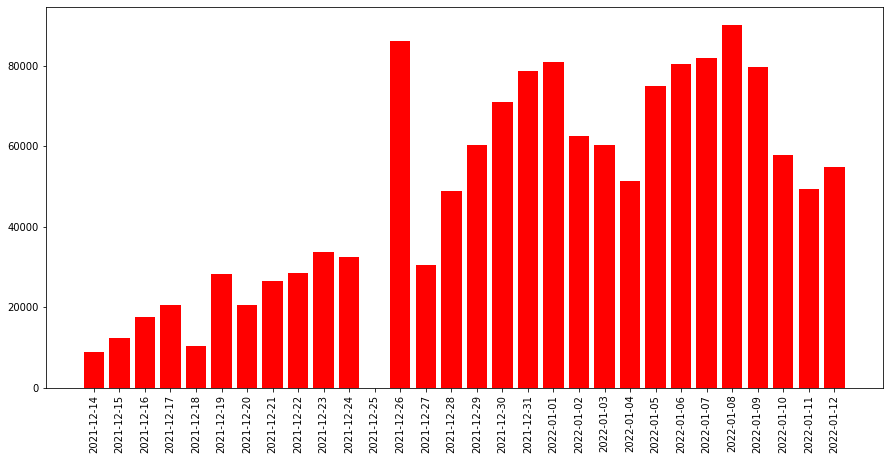

In [23]:
# A plot of new cases being reported in the last 30 days for NY
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

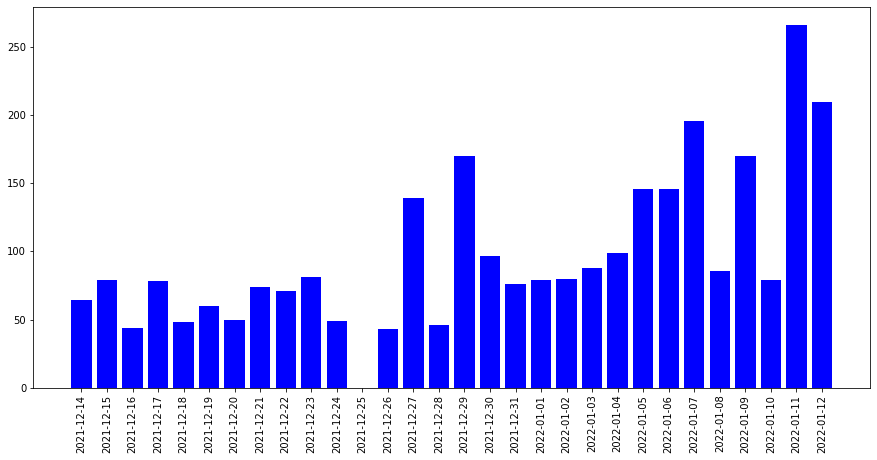

In [154]:
# A plot of new deaths being reported in the last 30 days for NY
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with top 5 states by population

We wanted to see how New York compared to some other states in terms of how well it has been able to handle the outbreak of the new variant, Omicron. We took the top 5 states by population, which included New York, and created various graphs visualizing the 


In [45]:
states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']
# CA approx. 39 mil people
# TX approx. 28 mil people
# FL approx. 21 mil people
# NY approx. 20 mil people
# PA approx. 13 mil people

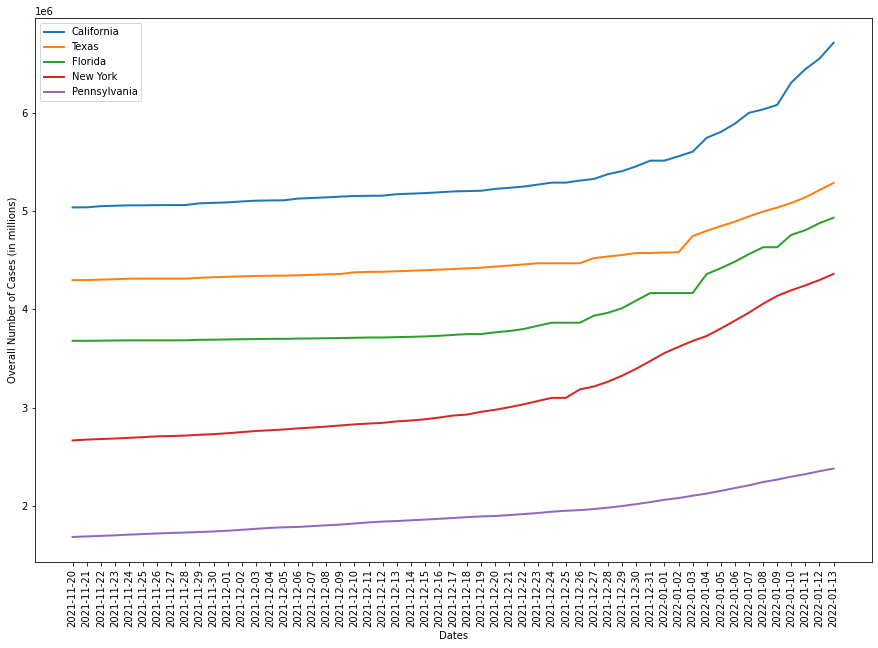

In [148]:
# Visualizes the overall cases reported for the top 5 states by population
plt.figure(figsize=(15,10))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-11-20')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Overall Number of Cases (in millions)')
plt.legend(states)
plt.show()


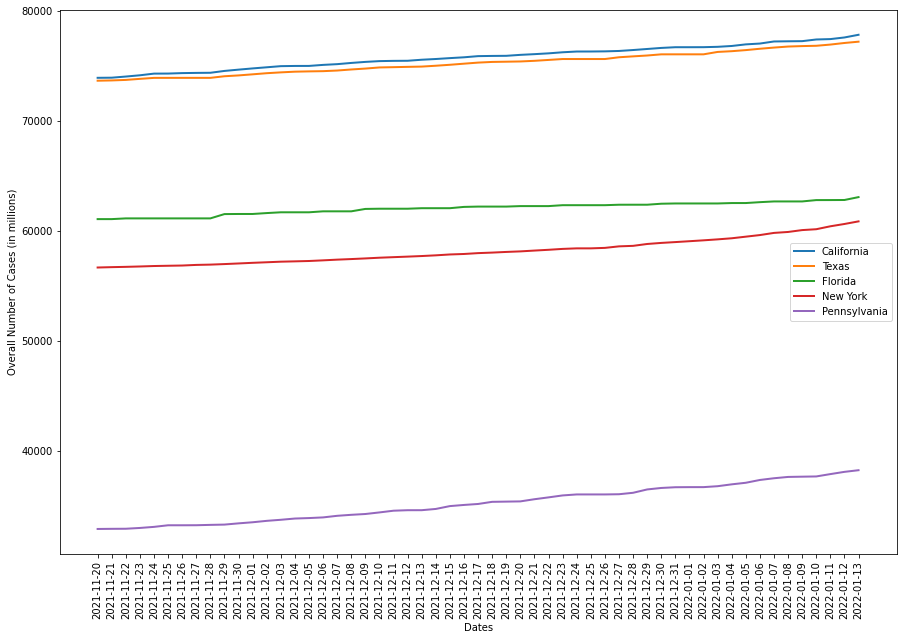

In [149]:
# Visualizes the total cases reported for the top 5 states by population
# It is from November 20, 2021 (a few days before the first case of Omicron)
# until the latest day
plt.figure(figsize=(15,10))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-11-20')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Overall Number of Cases (in millions)')
plt.legend(states)
plt.show()

In [114]:
# Visualization of the latest total number of reported cases and deaths in each state
# Organized in descending order from the highest number of cases to least number of cases
updated=latest_df.sort_values(by=['cases'], ascending=True)
fig4 = px.bar(updated, x=['cases','deaths'], y='state',            
             labels={'value':'Population', 'variable':'Key'}, height=1000,
             barmode='overlay')


In [115]:
app = JupyterDash(__name__)
app.layout = html.Div([dcc.Graph(figure=fig4)])
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

# Conclusion

Below are the conclusions:

We were intrigued by how the Omicron variant of COVID-19 has affected people due to how it is beginning to influence our daily lives like the original COVID-19 outbreak.

1.   Conclusion 1
     -- In the last 30 days, New York has trended upwards in terms of new cases per day, but the number of deaths per day remain relatively low in comparison. This signifies that when the rise of omicron entered New York, the rates of deaths stays at low levels even if the infection rate increasese overall.

2.   Conclusion 2
     -- The number of new cases per day in the US has grown in the last 30 days, the number of deaths per day has remained relatively low. This suggests that when omicron initially came in the United States, the fatality rate was modest even if the infection rate grew, and was less lethal than the original COVID-19. 
